# Graph Network of e-coupling and distance (2D)

## Part 1: Whole network of all molecules

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Matplotlib settings
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['figure.dpi'] = 100

In [2]:
# Extract data
molecules = pd.read_csv("../../data/e-coupling_with_nn_distance.txt", sep="\t")

# Drawing the whole network
G = nx.Graph()
G.add_nodes_from(molecules["Mol_i"])
G.add_edges_from(zip(molecules["Mol_i"], molecules["Mol_j_nearest"]))
# Alternate way to form list of tuples from pandas DataFrame
# list(molecules[["Mol_i", "Mol_j_nearest"]].itertuples(index=False, name=None))

# Set edge attributes
for i, (u, v) in enumerate(G.edges):
    G[u][v]["extracted_value"] = molecules["extracted_value"][i]
    G[u][v]["Distance_nm"] = molecules["Distance_nm"][i]

# Checking
print(f'Num nodes: {len(G.nodes)}') # Number of nodes
print(f'Num edges: {len(G.edges)}') # Number of edges
print(f'Data node: {list(G.nodes(data=True))[:3]}') # Node data
print(f'Data edges: {list(G.edges(data=True))[0]}') # Edge data

Num nodes: 1237
Num edges: 809
Data node: [(1000, {}), (1001, {}), (1002, {})]
Data edges: (1000, 698, {'extracted_value': np.float64(0.0086763445541123), 'Distance_nm': np.float64(0.807773)})


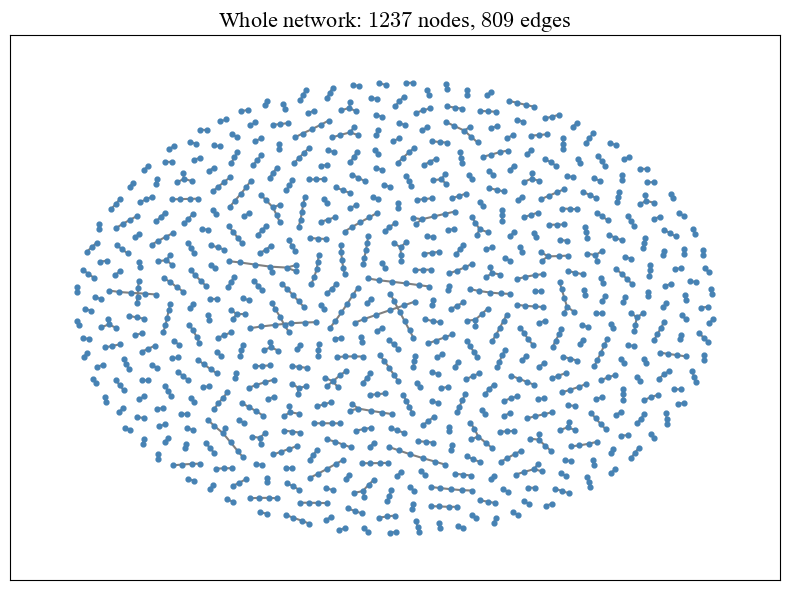

In [3]:
# Visualize the graph
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(f"Whole network: ${len(G.nodes)}$ nodes, ${len(G.edges)}$ edges", fontsize=16)
nx.draw_networkx(
    G,
    with_labels=False,
    font_weight="bold",
    node_size=12,
    width=1.5,
    node_color="steelblue",
    edge_color="gray",
)
plt.tight_layout()
plt.savefig("../../reports/images/01_graph_network_of_e-coupling_2D.png", dpi=300)
plt.show()

## Part 2: Longest network of molecules

In [4]:
# Use connected_components to find all disjoint subgraphs
# Note that a generator is returned, so we convert it to a list
mol_i_longest_chain = list(max(nx.connected_components(G), key=len))
mol_j_longest_chain = [int(molecules.query("Mol_i == @e")["Mol_j_nearest"].values[0]) for e in mol_i_longest_chain]

# Creating the longest network Graph
G2 = nx.Graph()
G2.add_edges_from(zip(mol_i_longest_chain, mol_j_longest_chain))

# Checking
print(f'Connected components: {list(nx.connected_components(G))[:3]}')
print(f'Longest network: {mol_i_longest_chain}')

Connected components: [{707, 39, 1000, 1448, 721, 698, 987}, {1080, 1001}, {1002, 298, 758}]
Longest network: [708, 1029, 946, 538, 152, 89, 954, 924]


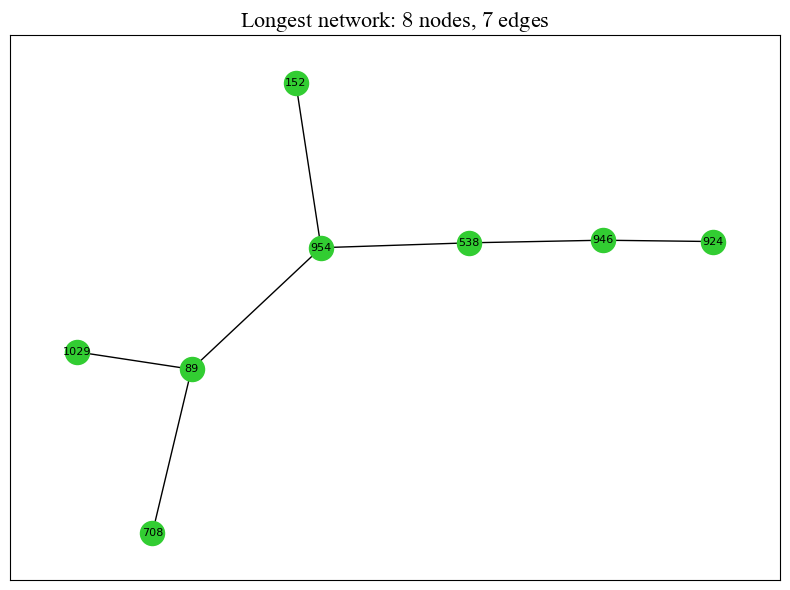

In [5]:
# Visualize the graph
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.set_title(f"Longest network: ${len(set(G2))}$ nodes, ${int(len(G2.edges))}$ edges", fontsize=16)
nx.draw_networkx(
    G2, 
    with_labels=True, 
    node_color='limegreen',
    font_size=8,
)
plt.tight_layout()
plt.savefig("../../reports/images/01_longest_network.png", dpi=300)
plt.show()

## Part 3: Finding needle in a haystack

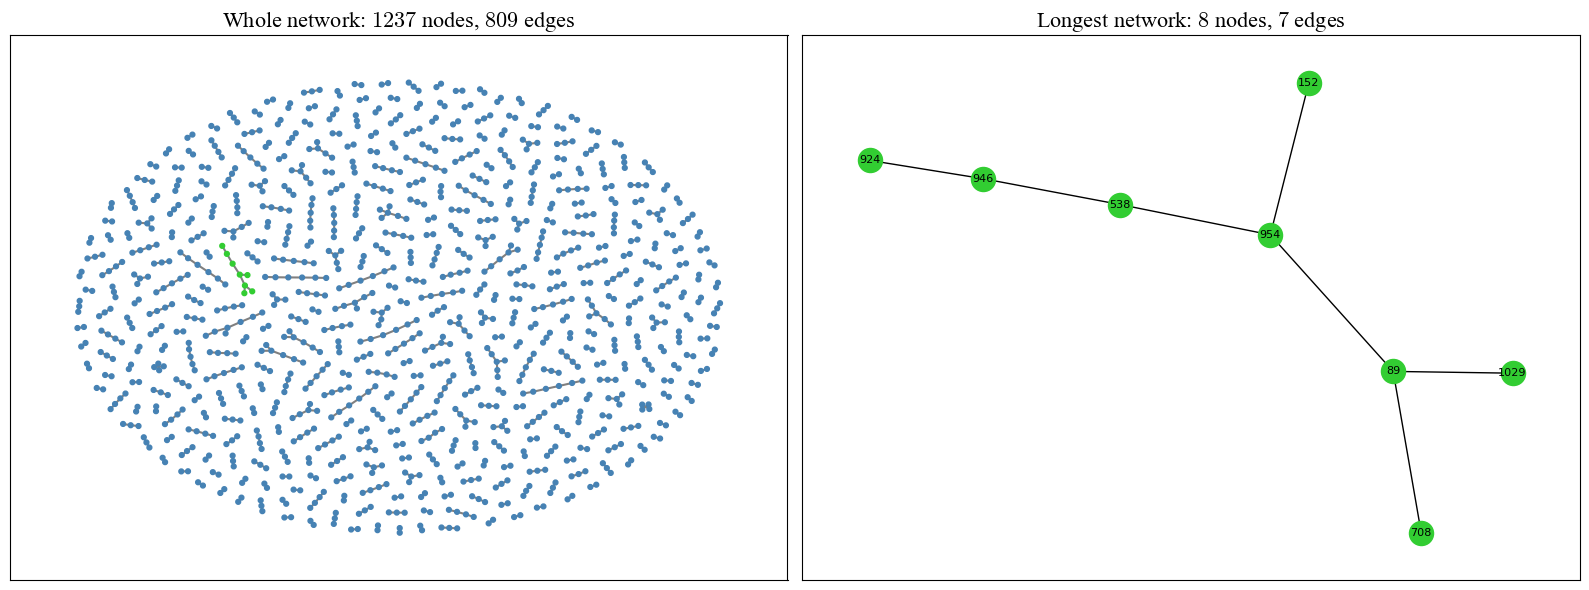

In [7]:
# Setting colors for the longest network
# nx.draw_networkx only accepts a list of colors for nodes      
node_colors = ["limegreen" if node in set(G2) else "steelblue" for node in G.nodes]

# Visualize the graph
fig3, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6))

ax3.set_title(f"Whole network: ${len(G.nodes)}$ nodes, ${len(G.edges)}$ edges", fontsize=16)
nx.draw_networkx(
    G,
    with_labels=False,
    font_weight="bold",
    node_size=12,
    width=1.5,
    node_color=node_colors,
    edge_color="gray",
    ax=ax3
)
ax4.set_title(f"Longest network: ${len(set(G2))}$ nodes, ${int(len(G2.edges))}$ edges", fontsize=16)
nx.draw_networkx(
    G2, 
    with_labels=True, 
    node_color='limegreen',
    font_size=8,
    ax=ax4
)
plt.tight_layout()
plt.savefig("../../reports/images/01_graph_network_of_e-coupling_2D_green.png", dpi=300)
plt.show()